In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt

# Import API key
from project_one_api import mlb_api_key
from project_one_api import nfl_api_key
from project_one_api import nhl_api_key

# File to Load
nfl_payroll_file = "nfl_payroll_new.csv"

# Read Purchasing File and store into Pandas data frame
nfl_payroll_data = pd.read_csv(nfl_payroll_file, encoding="utf-8")

# nfl_payroll_data['Payroll'] = nfl_payroll_data['Payroll'].str.replace(',', '')
# nfl_payroll_data['Payroll'] = nfl_payroll_data['Payroll'].str.replace('$', '')

# Convert columns from string to float
nfl_payroll_data['Year'] = nfl_payroll_data['Year'].astype(str)
nfl_payroll_data['Payroll'] = nfl_payroll_data['Payroll'].astype(float)

nfl_payroll_data = nfl_payroll_data[["Team","Year","Payroll","Relative Payroll"]]

nfl_payroll_data["Team"] = nfl_payroll_data["Year"] + nfl_payroll_data["Team"].map(str)

nfl_payroll_data = nfl_payroll_data[["Team", "Payroll", "Relative Payroll"]]

nfl_payroll_data.head()

,Team,Payroll,Relative Payroll
0,2014Falcons,175728823.0,1.280923
1,2014Browns,156240488.0,1.138869
2,2014Ravens,152294429.0,1.110105
3,2014Cardinals,151750413.0,1.106140
4,2014Seahawks,151634452.0,1.105294


In [2]:
### NFL STATS AND PAYROLL ###

nfl_pd = pd.DataFrame({"Team": [""], "Win Pct": [""], "Year": [""], "Points For": [""], "Points Against": [""], "Point Differential": [""]})

years = [2014, 2015, 2016, 2017, 2018]
nfl_all_data = []

for year in years:
    nfl_query_url = f"https://api.sportradar.us/nfl/official/trial/v5/en/seasons/{year}/standings.json?api_key={nfl_api_key}"
    nfl_standings_response = requests.get(nfl_query_url)
    time.sleep(2)
    nfl_standings = nfl_standings_response.json()
    nfl_all_data.append(nfl_standings)

In [3]:
# loop through each year        
for w in range(0, len(nfl_all_data)):
   #loop through division
    for z in range(0,len(nfl_all_data[w]['conferences'])):
        for y in range(0,len(nfl_all_data[w]['conferences'][z]['divisions'])): 
            for x in range(0,len(nfl_all_data[w]['conferences'][z]['divisions'][y]['teams'])):
                nfl_team_name = nfl_all_data[w]['conferences'][z]['divisions'][y]['teams'][x]['name']
                nfl_win_pct = nfl_all_data[w]['conferences'][z]['divisions'][y]['teams'][x]['win_pct']
                nfl_pts_for = nfl_all_data[w]['conferences'][z]['divisions'][y]['teams'][x]['points_for']
                nfl_pts_against = nfl_all_data[w]['conferences'][z]['divisions'][y]['teams'][x]['points_against']
                nfl_year = nfl_all_data[w]['season']['year']
                nfl_pd = nfl_pd.append({'Team' : nfl_team_name, 'Win Pct': nfl_win_pct, 'Year': nfl_year, 'Points For': nfl_pts_for, 
                                       'Points Against': nfl_pts_against}, ignore_index = True)
                
nfl_pd = nfl_pd.drop([0])

# Convert columns from string to float
nfl_pd['Year'] = nfl_pd['Year'].astype(str)
nfl_pd['Win Pct'] = nfl_pd['Win Pct'].astype(float)
nfl_pd['Points For'] = nfl_pd['Points For'].astype(float)
nfl_pd['Points Against'] = nfl_pd['Points Against'].astype(float)
nfl_pd['Point Differential'] = nfl_pd['Points For'] - nfl_pd['Points Against']

nfl_pd["Team"] = nfl_pd["Year"] + nfl_pd["Team"].map(str)

nfl_pd.head()

,Team,Win Pct,Year,Points For,Points Against,Point Differential
1,2014Patriots,0.750,2014,468.0,313.0,155.0
2,2014Bills,0.563,2014,343.0,289.0,54.0
3,2014Dolphins,0.500,2014,388.0,373.0,15.0
4,2014Jets,0.250,2014,283.0,401.0,-118.0
5,2014Steelers,0.688,2014,436.0,368.0,68.0


In [4]:
nfl_merged = pd.merge(nfl_pd, nfl_payroll_data, on='Team')

nfl_merged['Win Pct'] = nfl_merged['Win Pct'].multiply(100)

nfl_merged.head()

,Team,Win Pct,Year,Points For,Points Against,Point Differential,Payroll,Relative Payroll
0,2014Patriots,75.0,2014,468.0,313.0,155.0,132130517.0,0.963126
1,2014Bills,56.3,2014,343.0,289.0,54.0,135589765.0,0.988341
2,2014Dolphins,50.0,2014,388.0,373.0,15.0,144645040.0,1.054347
3,2014Jets,25.0,2014,283.0,401.0,-118.0,106085353.0,0.773278
4,2014Steelers,68.8,2014,436.0,368.0,68.0,138857568.0,1.012161


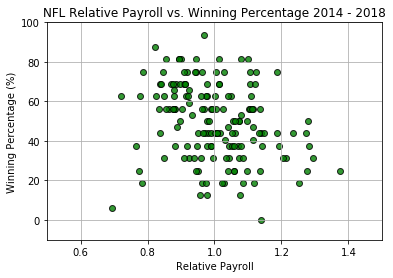

In [5]:
# Set x and y variables
x = nfl_merged["Relative Payroll"]
y = nfl_merged["Win Pct"]

# Build scatter plot
plt.scatter(x, y, marker="o", facecolors="green", edgecolors="black", alpha=0.8, linewidth=1, label="Relative Payroll v Win %")

plt.title(f"NFL Relative Payroll vs. Winning Percentage 2014 - 2018")
plt.xlabel("Relative Payroll")
plt.ylabel("Winning Percentage (%)")
plt.grid()
plt.xlim(0.5,1.5)
plt.ylim(-10,100)

# Save image
plt.savefig("Images/NFL_plot.png")

# Show image
plt.show()

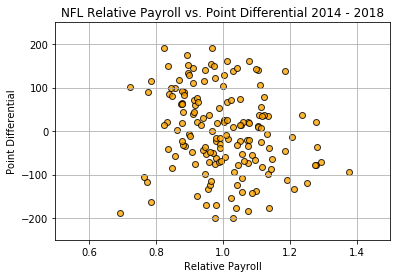

In [7]:
# Set x and y variables
y2 = nfl_merged["Point Differential"]

# Build scatter plot
plt.scatter(x, y2, marker="o", facecolors="orange", edgecolors="black", alpha=0.8, linewidth=1, label="Relative Payroll v Win %")

plt.title(f"NFL Relative Payroll vs. Point Differential 2014 - 2018")
plt.xlabel("Relative Payroll")
plt.ylabel("Point Differential")
plt.grid()
plt.xlim(0.5,1.5)
plt.ylim(-250,250)

# Save image
plt.savefig("Images/NFL_plot2.png")

# Show image
plt.show()